# MNIST Data Set - Basic Approach

View first the following video: https://www.youtube.com/watch?v=aircAruvnKk

## Get the MNIST Data

Importing the necessary packages

In [2]:
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils

from tensorflow.keras.datasets import mnist

Download and load the MNIST Dataset: https://en.wikipedia.org/wiki/MNIST_database

Split the data between train and test datasets

In [3]:
# Model / data parameters
num_classes = 10
input_image_shape = (28, 28, 1)
vector_shape = 28*28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 18s 2us/step


## Verify the data:
x_train & x_test: Input Images of mnist

y_train & y_test: Classification of the respective number presented in the image

In [4]:
print('Image_Size: ', x_train[0].shape, ' | Representative Value: ', y_train[0])

Image_Size:  (28, 28)  | Representative Value:  5


In [5]:
print('Number of images for training and its shape: ', x_train.shape, ' | Targets Lenght: ', len(y_train))

Number of images for training and its shape:  (60000, 28, 28)  | Targets Lenght:  60000


In [6]:
print('Number of images for testing and its shape: ', x_test.shape, ' | Targets Lenght: ', len(y_test))

Number of images for testing and its shape:  (10000, 28, 28)  | Targets Lenght:  10000


One-hot encoded!

One hot encoded format: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [7]:
onehot_encoded = np.eye(num_classes)[y_train]
print('Target:', y_train[0], ' | One-hot Encoded Target:', onehot_encoded[0])

Target: 5  | One-hot Encoded Target: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Visualizing the Data

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
x_train[0].shape

(28, 28)

In [11]:
# In case the data needs to be reshaped, used the following function
#reshaped = x_train[0].reshape(28,28)
#reshaped

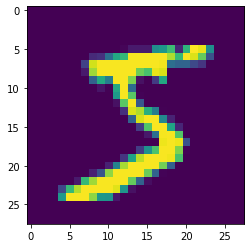

In [12]:
plt.imshow(x_train[0])

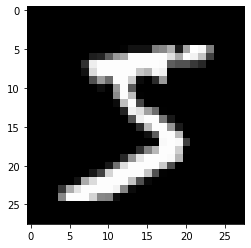

In [12]:
plt.imshow(x_train[0],cmap='gist_gray')

In [13]:
x_train[0].max()

255

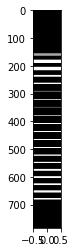

In [14]:
plt.imshow(x_train[0].reshape(784,1),cmap='gist_gray',aspect=0.01)

## Prepare Data

In [15]:
# Scale images to the [0, 1] range - also called normalization - to help with the training
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [16]:
# Flatten the images, i.e., reshape image matrix (28,28,1) to vector (28*28,1)=(784,1)
x_train = x_train.reshape((-1, vector_shape))
x_test = x_test.reshape((-1, vector_shape))

In [17]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 784)
x_test shape: (10000, 784)
60000 train samples
10000 test samples


In [18]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (60000, 10)
y_test shape: (10000, 10)


## Create and compile the Model

In [19]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [20]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [21]:
# Training the model and saving metrics in history
history = model.fit(
              x_train,
              y_train,
              epochs=20,
              batch_size=128,
              verbose=2, validation_data=(x_test, y_test)
)

Epoch 1/20
469/469 - 5s - loss: 0.2477 - accuracy: 0.9252 - val_loss: 0.1146 - val_accuracy: 0.9638
Epoch 2/20
469/469 - 4s - loss: 0.1016 - accuracy: 0.9681 - val_loss: 0.0752 - val_accuracy: 0.9752
Epoch 3/20
469/469 - 5s - loss: 0.0712 - accuracy: 0.9774 - val_loss: 0.0735 - val_accuracy: 0.9753
Epoch 4/20
469/469 - 4s - loss: 0.0573 - accuracy: 0.9815 - val_loss: 0.0703 - val_accuracy: 0.9782
Epoch 5/20
469/469 - 4s - loss: 0.0446 - accuracy: 0.9855 - val_loss: 0.0757 - val_accuracy: 0.9775
Epoch 6/20
469/469 - 4s - loss: 0.0389 - accuracy: 0.9872 - val_loss: 0.0718 - val_accuracy: 0.9790
Epoch 7/20
469/469 - 4s - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0606 - val_accuracy: 0.9831
Epoch 8/20
469/469 - 5s - loss: 0.0294 - accuracy: 0.9900 - val_loss: 0.0620 - val_accuracy: 0.9829
Epoch 9/20
469/469 - 4s - loss: 0.0286 - accuracy: 0.9904 - val_loss: 0.0617 - val_accuracy: 0.9834
Epoch 10/20
469/469 - 4s - loss: 0.0256 - accuracy: 0.9914 - val_loss: 0.0689 - val_accuracy: 0.9824

In [22]:
# Saving the model
save_dir = "." # Current Directory
model_name = 'keras_mnist.h5' # Name of the file
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at .\keras_mnist.h5 


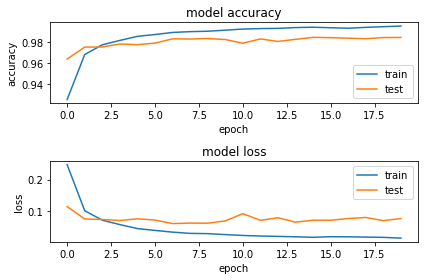

In [23]:
# Plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Evaluate the Model's Performance

In [24]:
# Load trained model and evaluate with test dataset
mnist_model = load_model('keras_mnist.h5')
loss_and_metrics = mnist_model.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0766 - accuracy: 0.9844
Test Loss 0.07663620263338089
Test Accuracy 0.9843999743461609


In [25]:
# Do a more deep evaluation

# load the model and create predictions on the test set
mnist_model = load_model('keras_mnist.h5')
predicted_classes = mnist_model.predict(x_test) #mnist_model.predict_class provides the int decoded value

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

7131  classified correctly
92869  classified incorrectly


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(predicted_classes, y_test))

Confusion Matrix


ValueError: Classification metrics can't handle a mix of continuous-multioutput and multilabel-indicator targets